In [1]:
!pip install keras_cv_attention_models -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_cv_attention_models import convnext

In [3]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# ConvNeXt Base Model

In [5]:
convnext_base = convnext.ConvNeXtBase(input_shape=(32, 32, 3), pretrained=None, num_classes=0)
x = tf.keras.layers.GlobalAveragePooling2D()(convnext_base.output)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
convnext_base_model = tf.keras.Model(convnext_base.input, x)

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

convnext_base_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history1 = convnext_base_model.fit(x_train, y_train, epochs=50, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/50


2023-04-13 20:49:22.905682: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/stack1_block2_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 170s 123ms/step - loss: 1.8286 - accuracy: 0.3587 - val_loss: 1.6083 - val_accuracy: 0.4258
Epoch 2/50
782/782 [==============================] - 90s 115ms/step - loss: 1.4037 - accuracy: 0.4989 - val_loss: 1.3496 - val_accuracy: 0.5201
Epoch 3/50
782/782 [==============================] - 90s 115ms/step - loss: 1.1678 - accuracy: 0.5856 - val_loss: 1.2542 - val_accuracy: 0.5501
Epoch 4/50
782/782 [==============================] - 88s 112ms/step - loss: 0.9639 - accuracy: 0.6617 - val_loss: 1.2262 - val_accuracy: 0.5724
Epoch 5/50
782/782 [==============================] - 91s 116ms/step - loss: 0.7445 - accuracy: 0.7401 - val_loss: 1.2309 - val_accuracy: 0.5852
Epoch 6/50
782/782 [==============================] - 90s 116ms/step - loss: 0.4997 - accuracy: 0.8295 - val_loss: 1.3245 - val_accuracy: 0.5860
Epoch 7/50
782/782 [==============================] - 88s 112ms/step - loss: 0.2797 - accuracy: 0.9093 - val_loss: 1.5284 - val_accuracy: 0.

In [8]:
convnext_base_model.save("convnext_base_model_10.h5")

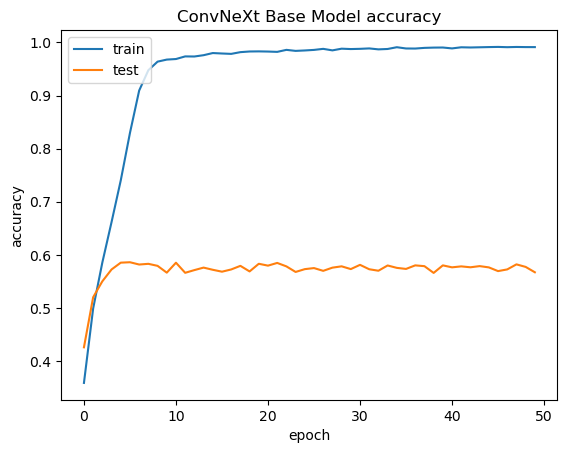

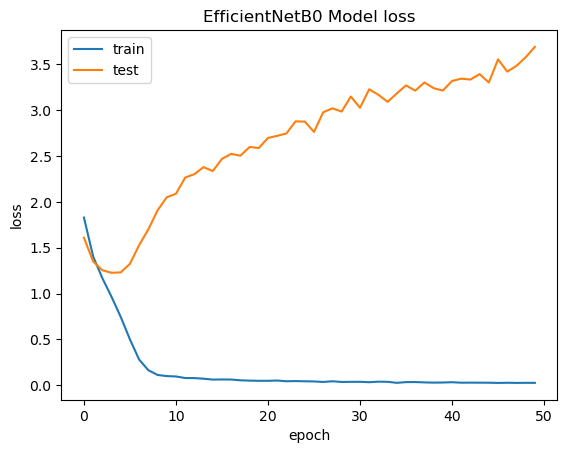

In [9]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('ConvNeXt Base Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('EfficientNetB0 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# CovnNeXt Large

In [10]:
convnext_large = convnext.ConvNeXtLarge(input_shape=(32, 32, 3), pretrained=None, num_classes=0)
x3 = tf.keras.layers.GlobalAveragePooling2D()(convnext_large.output)
x3 = tf.keras.layers.Dense(10, activation='softmax')(x3)
convnext_large_model = tf.keras.Model(convnext_large.input, x3)

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

convnext_large_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [12]:
history3 = convnext_large_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50


2023-04-13 22:06:58.468815: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/stack1_block2_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


782/782 [==============================] - 192s 162ms/step - loss: 1.8738 - accuracy: 0.3587 - val_loss: 1.6374 - val_accuracy: 0.4161
Epoch 2/50
782/782 [==============================] - 133s 170ms/step - loss: 1.4894 - accuracy: 0.4665 - val_loss: 1.4614 - val_accuracy: 0.4762
Epoch 3/50
782/782 [==============================] - 132s 169ms/step - loss: 1.3279 - accuracy: 0.5252 - val_loss: 1.3600 - val_accuracy: 0.5073
Epoch 4/50
782/782 [==============================] - 133s 170ms/step - loss: 1.1953 - accuracy: 0.5746 - val_loss: 1.3095 - val_accuracy: 0.5339
Epoch 5/50
782/782 [==============================] - 123s 157ms/step - loss: 1.0668 - accuracy: 0.6168 - val_loss: 1.2454 - val_accuracy: 0.5571
Epoch 6/50
782/782 [==============================] - 123s 157ms/step - loss: 0.9163 - accuracy: 0.6728 - val_loss: 1.2613 - val_accuracy: 0.5681
Epoch 7/50
782/782 [==============================] - 133s 170ms/step - loss: 0.7357 - accuracy: 0.7382 - val_loss: 1.3439 - val_accura

In [13]:
convnext_large_model.save("convnext_large_model_10.h5")

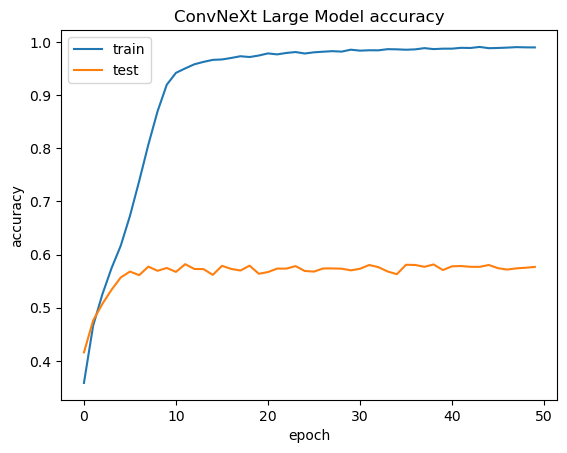

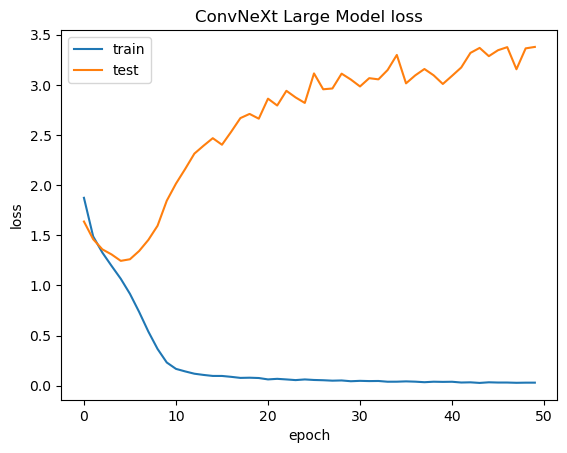

In [14]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('ConvNeXt Large Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('ConvNeXt Large Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()